
## Build a Customer Feedback Analyzer with DataLab

### **Introduction**

#### Dataset Overview:
- The `guest_data_with_reviews.xlsx` dataset contains customer feedback from a hospitality business.
- Key columns include:
  - `How likely are you to recommend us to a friend or colleague?` for Net Promoter Score (NPS) calculations.
  - `Review` for textual feedback, useful for sentiment analysis and topic modeling.

#### Key Concepts:
1. **Net Promoter Score (NPS):** Measures customer loyalty. Scores:
   - 9–10: Promoters
   - 7–8: Passives
   - 0–6: Detractors
   - Formula: NPS = percentage of promoters - percentage of detractors

2. **Sentiment Analysis:** Identifies the emotional tone (positive, negative, or neutral) in reviews using pre-trained AI models.

3. **Topic Modeling:** Uses embeddings to identify recurring themes in text data.

---



### **Workbook Activities**

#### 1. Exploratory Data Analysis (EDA)


In [55]:
# Import plotly and pandas
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [56]:
# Read in the dataset "guest_data_with_reviews.xlsx" and show the first five rows

In [57]:
import pandas as pd

df = pd.read_excel('guest_data_with_reviews.xlsx')
df.head()

,ID,Start time,Completion time,Email,Name,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,How did you discover us?,Rate your overall experience in our hotel,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Gym,Review
0,1,NaN,NaN,NaN,NaN,Guest 00001,Male,1993-10-02,2022-04-07,Business,Organization,3,9,Good,Good,Very good,Poor,Very good,Average,Excellent,Excellent,it was an okay experience overall. the room wa...
1,3,NaN,NaN,NaN,NaN,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,News paper,4,4,Poor,Good,Very good,Average,Poor,Poor,Good,Very good,the stay was memorable thanks to the poor staf...
2,4,NaN,NaN,NaN,NaN,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,Search engine,5,6,Good,Very good,Good,Poor,Average,Poor,Poor,Excellent,while the staff were good and did their best t...
3,5,NaN,NaN,NaN,NaN,Guest 00005,Male,1961-08-08,2022-06-24,Business,hotel booking sites,5,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,Good,the hotel experience was average at best. the ...
4,8,NaN,NaN,NaN,NaN,Guest 00008,Male,1981-11-27,2020-02-01,Business,Organization,1,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,Very good,"not my favorite stay, but the good staff helpe..."


In [58]:
# What's the total length of the dataset?

In [59]:
df.count

<bound method DataFrame.count of         ID  ...                                             Review
0        1  ...  it was an okay experience overall. the room wa...
1        3  ...  the stay was memorable thanks to the poor staf...
2        4  ...  while the staff were good and did their best t...
3        5  ...  the hotel experience was average at best. the ...
4        8  ...  not my favorite stay, but the good staff helpe...
...    ...  ...                                                ...
1103  1942  ...  i was pleasantly surprised by how excellent th...
1104  1945  ...  the hotel experience was average at best. the ...
1105  1946  ...  this stay was a mix of good and bad. the staff...
1106  1947  ...  there’s room for improvement here. while the s...
1107  1948  ...  not my favorite stay, but the excellent staff ...

[1108 rows x 22 columns]>

In [60]:
# How would you identify missing values in this dataset?

In [61]:
missing_values = df.isnull().sum()
missing_values

ID                                                                 0
Start time                                                      1108
Completion time                                                 1108
Email                                                           1108
Name                                                            1108
Full Name                                                          0
Gender                                                             0
Date of Birth                                                      0
Checkout Date                                                      0
Purpose of the visit                                               0
How did you discover us?                                           0
Rate your overall experience in our hotel                          0
How likely are you to recommend us to a friend or colleague?       0
Staff attitude                                                     0
Check-in Process                  

In [62]:
# How would you remove the missing values in this dataset?

In [63]:
df = df.dropna()
df.head()

,ID,Start time,Completion time,Email,Name,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,How did you discover us?,Rate your overall experience in our hotel,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Gym,Review


In [64]:
# We're interested in the recommendation scores. What is their distribution? 

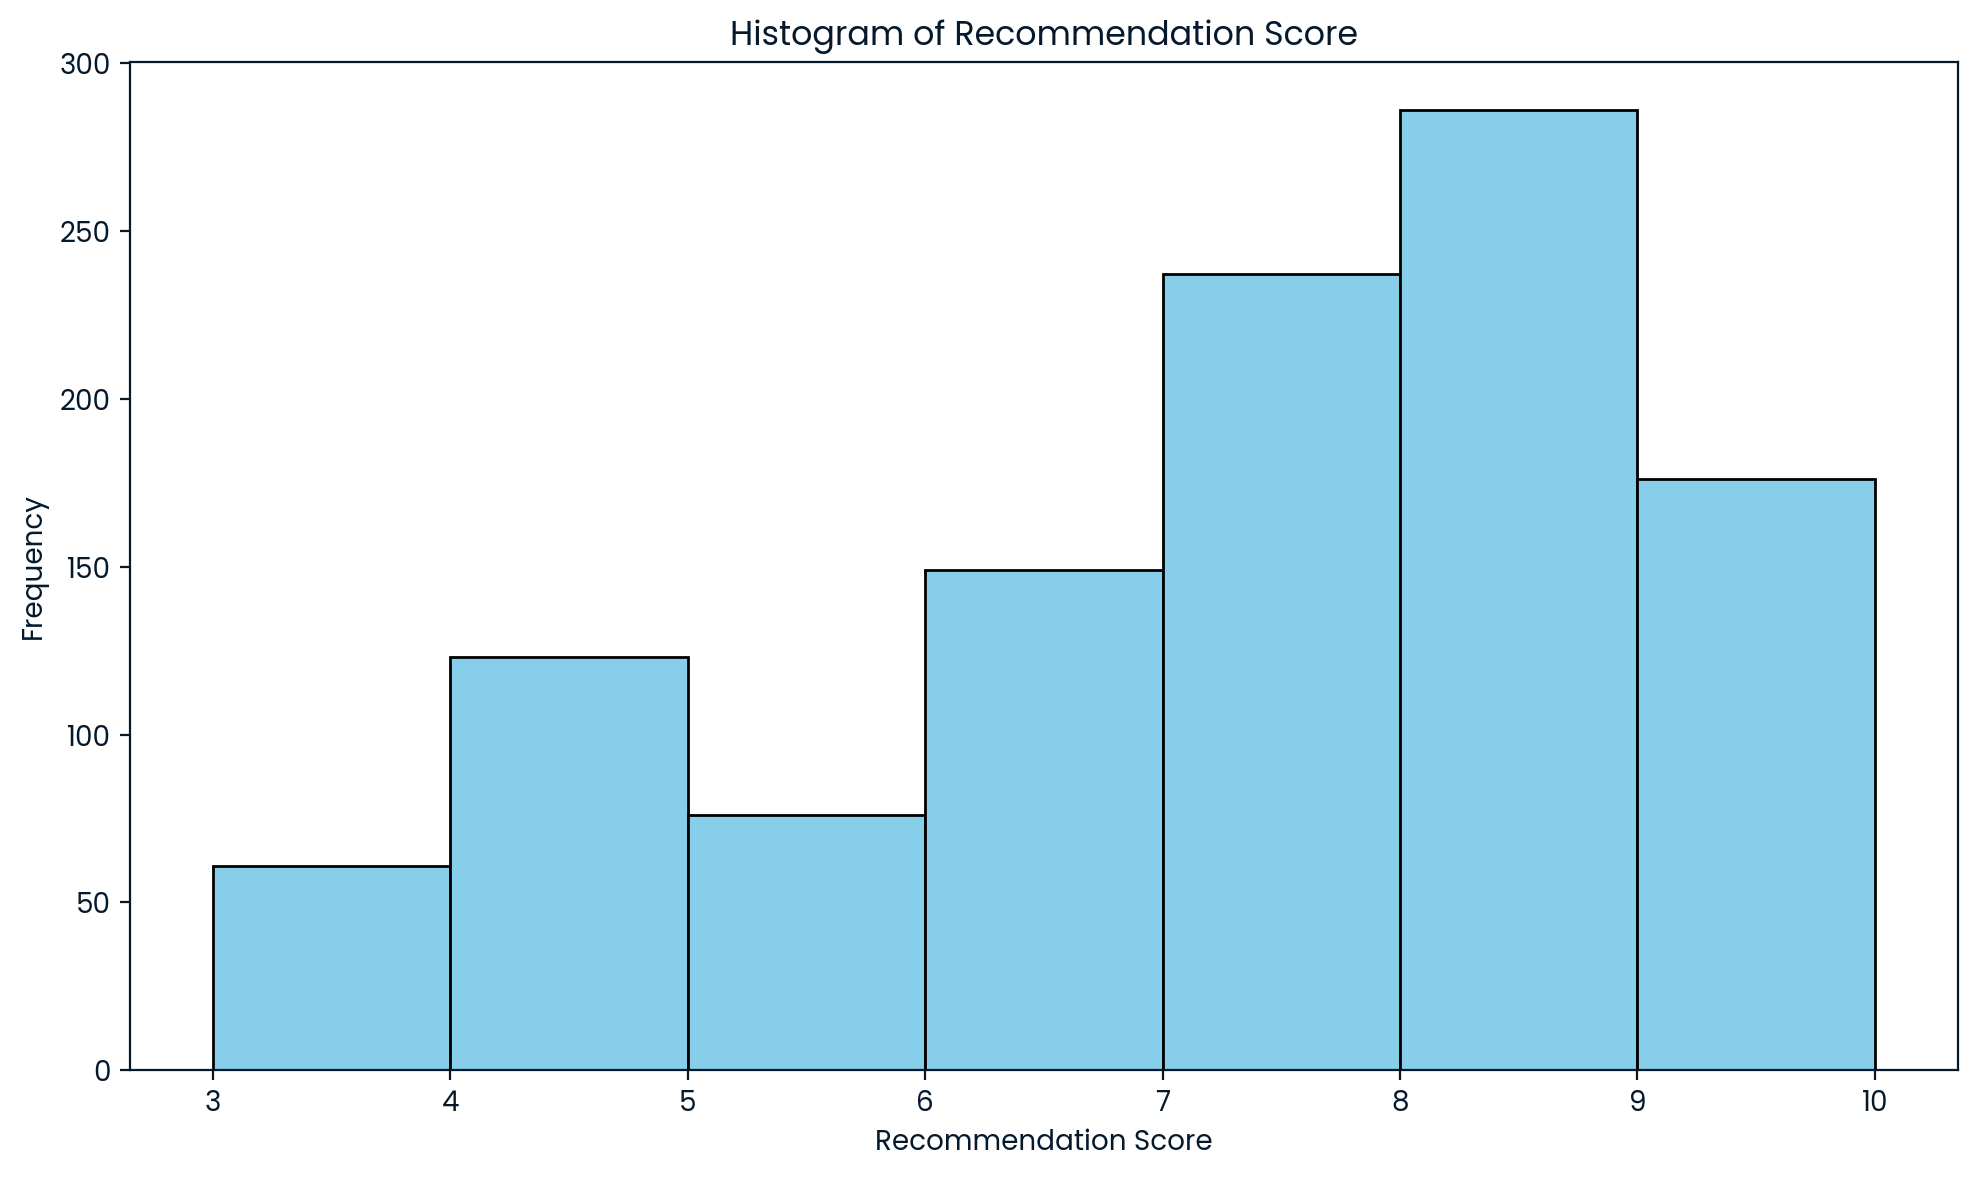

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(df1['How likely are you to recommend us to a friend or colleague?'], bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Recommendation Score')
plt.ylabel('Frequency')
plt.title('Histogram of Recommendation Score')
plt.tight_layout()
plt.show()


#### 2. Calculate NPS

In [66]:
# Classify scores as promoters (9-10), passives (7-8), and detractors (0-6)

In [67]:
# Classify scores as promoters (9-10), passives (7-8), and detractors (0-6)
def classify_nps(score):
    if score >= 9:
        return 'Promoter'
    elif score >= 7:
        return 'Passive'
    else:
        return 'Detractor'

df1['NPS Category'] = df1['How likely are you to recommend us to a friend or colleague?'].apply(classify_nps)
df1

,ID,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,How did you discover us?,Rate your overall experience in our hotel,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Review,NPS Category
0,1,Guest 00001,Male,1993-10-02,2022-04-07,Business,Organization,3,9,Good,Good,Very good,Poor,Very good,Average,Excellent,it was an okay experience overall. the room wa...,Promoter
1,3,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,News paper,4,4,Poor,Good,Very good,Average,Poor,Poor,Good,the stay was memorable thanks to the poor staf...,Detractor
2,4,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,Search engine,5,6,Good,Very good,Good,Poor,Average,Poor,Poor,while the staff were good and did their best t...,Detractor
3,5,Guest 00005,Male,1961-08-08,2022-06-24,Business,hotel booking sites,5,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,the hotel experience was average at best. the ...,Detractor
4,8,Guest 00008,Male,1981-11-27,2020-02-01,Business,Organization,1,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,"not my favorite stay, but the good staff helpe...",Passive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1942,Guest 01942,Male,2006-09-17,2022-10-07,Vacation,hotel booking sites,3,8,Excellent,Very good,Good,Good,Very good,Average,Poor,i was pleasantly surprised by how excellent th...,Passive
1104,1945,Guest 01945,Male,1971-12-11,2021-05-12,Function,hotel booking sites,4,7,Poor,Average,Good,Very good,Good,Very good,Good,the hotel experience was average at best. the ...,Passive
1105,1946,Guest 01946,Male,1967-01-16,2020-09-10,Other,Word of mouth,4,3,Very good,Very good,Average,Poor,Good,Average,Good,this stay was a mix of good and bad. the staff...,Detractor
1106,1947,Guest 01947,Male,2003-06-17,2022-11-17,Vacation,hotel booking sites,4,8,Good,Excellent,Good,Good,Poor,Average,Good,there’s room for improvement here. while the s...,Passive


In [68]:
# What proportion of customers are promoters, passives, and detractors?

In [69]:
# Calculate the proportion of customers in each NPS category
nps_counts = df1['NPS Category'].value_counts(normalize=True) * 100

# Display the proportions
nps_counts

NPS Category
Passive      47.202166
Detractor    36.913357
Promoter     15.884477
Name: proportion, dtype: float64

In [70]:
# Calculate the overall NPS and interpret its meaning

In [71]:
# Calculate the overall NPS and interpret its meaning

# Calculate the number of promoters, passives, and detractors
promoters = df1[df1['NPS Category'] == 'Promoter'].shape[0]
passives = df1[df1['NPS Category'] == 'Passive'].shape[0]
detractors = df1[df1['NPS Category'] == 'Detractor'].shape[0]

# Calculate the total number of responses
total_responses = df1.shape[0]

# Calculate the NPS score
nps_score = ((promoters - detractors) / total_responses) * 100

# Interpret the NPS score
if nps_score > 0:
    nps_interpretation = "Positive"
elif nps_score < 0:
    nps_interpretation = "Negative"
else:
    nps_interpretation = "Neutral"

nps_score, nps_interpretation

(-21.028880866425993, 'Negative')

In [72]:
# What does the NPS value indicate about customer loyalty?

In [73]:

if nps_score > 50:
    detailed_interpretation = "Excellent - Your customers love you and are very likely to recommend your services."
elif 20 <= nps_score <= 50:
    detailed_interpretation = "Good - Your customers are satisfied and likely to recommend your services."
elif 0 <= nps_score < 20:
    detailed_interpretation = "Average - Your customers are somewhat satisfied but there is room for improvement."
elif -20 <= nps_score < 0:
    detailed_interpretation = "Poor - Your customers are not very satisfied and may not recommend your services."
else:
    detailed_interpretation = "Very Poor - Your customers are unhappy and unlikely to recommend your services."

nps_score, nps_interpretation, detailed_interpretation

(-21.028880866425993,
 'Negative',
 'Very Poor - Your customers are unhappy and unlikely to recommend your services.')

#### 3. Sentiment Analysis 

In [74]:
# Analyze sentiments in the reviews using a pre-trained model

In [85]:
# First, install the required tf-keras package
!pip install tf-keras

from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_analysis = pipeline('sentiment-analysis')

# Apply sentiment analysis to the 'Review' column and create a new 'Sentiment' column
df1['Sentiment'] = df1['Review'].apply(lambda review: sentiment_analysis(review)[0]['label'])

# Display the first few rows of the 'Review' and 'Sentiment' columns
df1[['Review', 'Sentiment']].head()

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 46.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.16.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.4.1 which is incompatible.
tensorflow-cp

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

,Review,Sentiment
0,it was an okay experience overall. the room wa...,POSITIVE
1,the stay was memorable thanks to the poor staf...,NEGATIVE
2,while the staff were good and did their best t...,NEGATIVE
3,the hotel experience was average at best. the ...,NEGATIVE
4,"not my favorite stay, but the good staff helpe...",POSITIVE


In [13]:
# Visualize sentiment distribution across the dataset

In [86]:
import plotly.express as px

# Ensure 'Sentiment' column exists in df1
if 'Sentiment' in df1.columns:
    # Visualize sentiment distribution across the dataset
    sentiment_counts = df1['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']
    sentiment_distribution = px.bar(sentiment_counts, 
                                    x='Sentiment', 
                                    y='Count', 
                                    title='Sentiment Distribution Across the Dataset', 
                                    labels={'Sentiment': 'Sentiment', 'Count': 'Count'})
    sentiment_distribution.show()
else:
    print("The 'Sentiment' column does not exist in the dataframe.")

In [14]:
# How would you interpret the sentiment distribution?

In [87]:
# Check the columns of the DataFrame to ensure 'Sentiment' exists
print(df1.columns)

# Calculate the sentiment count
if 'Sentiment' in df1.columns:
    sentiment_count = df1['Sentiment'].value_counts()
    
    # Create a DataFrame for sentiment count
    sentiment_count_df = sentiment_count.reset_index()
    sentiment_count_df.columns = ['Sentiment', 'Count']
    
    # Display the sentiment count DataFrame
    display(sentiment_count_df)
else:
    print("The 'Sentiment' column does not exist in the DataFrame.")

Index(['ID', 'Full Name', 'Gender', 'Date of Birth', 'Checkout Date',
       'Purpose of the visit', 'How did you discover us?',
       'Rate your overall experience in our hotel',
       'How likely are you to recommend us to a friend or colleague?',
       'Staff attitude', 'Check-in Process', 'Room service',
       'Room cleanliness', 'Food quality', 'Variety of food', 'Broadband & TV',
       'Review', 'NPS Category', 'Sentiment'],
      dtype='object')


,Sentiment,Count
0,NEGATIVE,829
1,POSITIVE,279


#### 4. Topic Modeling

In [15]:
# What are some common keywords in the reviews?

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Combine all reviews into a single text
all_reviews = " ".join(df1['Review'].dropna().tolist())

# Use CountVectorizer to find common keywords
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform([all_reviews])

# Get the common keywords
common_keywords = vectorizer.get_feature_names_out()

# Create a DataFrame to display the common keywords
common_keywords_df = pd.DataFrame(common_keywords, columns=['Common Keywords'])
common_keywords_df

,Common Keywords
0,best
1,cleanliness
2,excellent
3,experience
4,food
5,good
6,room
7,staff
8,stay
9,wasn


In [16]:
# Extract key topics from the reviews using embeddings

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd

# Combine all reviews into a single text
all_reviews = df1['Review'].dropna().tolist()

# Use TfidfVectorizer to convert the text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(all_reviews)

# Use NMF to extract topics
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

# Get the top words for each topic
words = tfidf_vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [words[i] for i in topic.argsort()[:-11:-1]]
    topics.append(top_words)

# Create a DataFrame to display the topics
topics_df = pd.DataFrame(topics, columns=[f'Word {i+1}' for i in range(10)])
topics_df.index = [f'Topic {i+1}' for i in range(num_topics)]
topics_df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,expectations,cleanliness,match,memorable,unfortunately,thanks,quality,didn,stay,staff
Topic 2,consider,need,returning,significant,upgrades,helped,favorite,stay,staff,food
Topic 3,overall,approach,make,okay,bit,tried,work,use,experience,good
Topic 4,best,experience,worst,improved,assist,did,dining,areas,focus,future
Topic 5,wasn,good,leave,liked,impression,pleasantly,clean,surprised,left,downs


In [17]:
# Visualize results as a word cloud

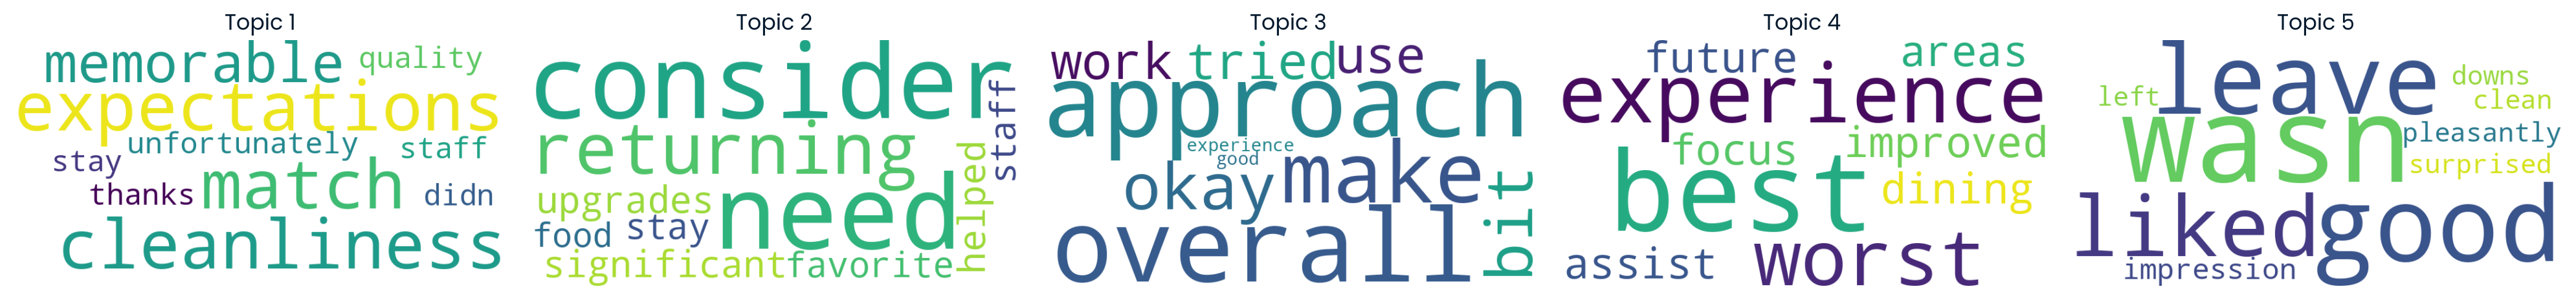

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for each topic
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(topics[i]))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()